# **I. Initialization**

## A. Google mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## B. Constants

In [2]:
# Constants
PATH = '/content/drive/My Drive/Colab Notebooks/ocr_data_scientist/P7 Modèle de scoring/'

## C. Imports

In [3]:
# Imports
import glob
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import sys

from collections import Counter
from importlib import reload
from sklearn.preprocessing import MinMaxScaler

os.chdir(PATH)
if PATH not in sys.path:
    sys.path.append(PATH)
import std_eda
import std_q7
import std_histogram
import std_pareto
import std_piechart
import std_correlation
reload(std_eda)
reload(std_q7)
reload(std_histogram)
reload(std_pareto)
reload(std_piechart)
reload(std_correlation)
# If any issue in loading a module present in the PATH:
# - deconnect from Google Drive;
# - reconnect to it

<module 'std_correlation' from '/content/drive/My Drive/Colab Notebooks/ocr_data_scientist/P7 Modèle de scoring/std_correlation.py'>

## D. Options

In [4]:
# Options
sns.set_theme(style="darkgrid")
pd.set_option('display.max_colwidth', None)

## E. Uploads

In [5]:
# Uploads
application_train_df = pd.read_csv(PATH + 'data/application_train.csv', sep=',')
application_test_df = pd.read_csv(PATH + 'data/application_test.csv', sep=',')
bureau_df = pd.read_csv(PATH + 'data/bureau.csv', sep=',')
bureau_balance_df = pd.read_csv(PATH + 'data/bureau_balance.csv', sep=',')
previous_application_df = pd.read_csv(PATH + 'data/previous_application.csv', sep=',')
POS_CASH_balance_df = pd.read_csv(PATH + 'data/POS_CASH_balance.csv', sep=',')
installments_payments_df = pd.read_csv(PATH + 'data/installments_payments.csv', sep=',')
credit_card_balance_df = pd.read_csv(PATH + 'data/credit_card_balance.csv', sep=',')
HomeCredit_columns_description_df = pd.read_csv(PATH + 'data/HomeCredit_columns_description.csv',sep=',',encoding="latin1")

# Affect dataframe names
application_train_df.name = 'application_train'
application_test_df.name = 'application_test'
bureau_df.name = 'bureau'
bureau_balance_df.name = 'bureau_balance'
previous_application_df.name = 'previous_application'
POS_CASH_balance_df.name = 'POS_CASH_balance'
installments_payments_df.name = 'installments_payments'
credit_card_balance_df.name = 'credit_card_balance'
HomeCredit_columns_description_df.name = 'HomeCredit_columns_description_df'

# **II. Exploratory data analysis**

In [6]:
# Exploratory data analysis
# Save and use the future cleaned dataframe, in order to save memory.
my_dataset = [application_train_df, application_test_df,
              bureau_df, bureau_balance_df,
              previous_application_df, POS_CASH_balance_df,
              installments_payments_df, credit_card_balance_df]
explorator = std_eda.Eda_Explorator(my_dataset)

In [7]:
# In dataframe previous application, NaN are saved as 'XNA'
previous_application_df.replace('XNA', np.nan, inplace=True)

In [8]:
if False:
    explorator.dataset_infos()

In [9]:
if False:
    explorator.dataset_plot()

([<matplotlib.patches.Wedge at 0x7f3c542015d0>,
 [Text(-0.4584011491451453, -0.9999341910657973, 'Train set'),
  Text(0.45840119595544226, 0.9999341696064898, 'Test set')],
 [Text(-0.25003699044280653, -0.545418649672253, '86.3'),
  Text(0.2500370159756957, 0.5454186379671762, '13.7')])

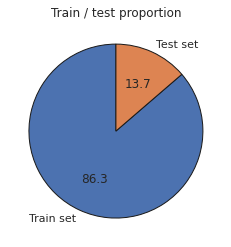

In [10]:
plt.title('Train / test proportion')
plt.pie(x=[application_train_df.shape[0], application_test_df.shape[0]],
        labels=['Train set', 'Test set'],
        autopct=lambda x: round(x, 1),
        startangle=90,
        wedgeprops={'edgecolor':'k', 'linewidth': 1})

## A. Distributions

### 1) One by one

In [11]:
if False:
    explorator.get_df_feat(df=bureau_df,
                        descr_df=HomeCredit_columns_description_df,
                        filter_feat='Table')

In [12]:
previous_application_df.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,NaN,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,NaN,Approved,-164,NaN,XAP,Unaccompanied,Repeater,NaN,Cash,x-sell,Contact center,-1,NaN,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,NaN,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,NaN,Approved,-512,Cash through the bank,XAP,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,NaN,Cash,walk-in,Credit and cash offices,-1,NaN,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


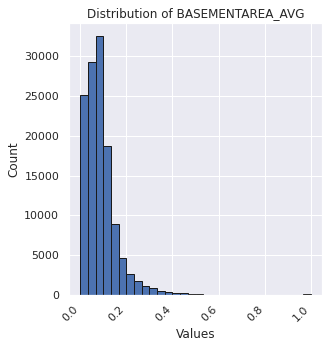

In [13]:
explorator.plot_feature(application_train_df, 45,
                        quantile_sup=1, quantile_inf=0.000)

### 2) Labels differences into train set

In [14]:
application_train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
label_0_df = application_train_df[application_train_df['TARGET']==0]
label_1_df = application_train_df[application_train_df['TARGET']==1]

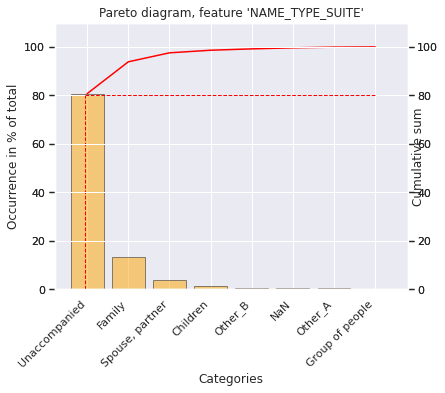

In [16]:
explorator.plot_feature(label_0_df, 11,
                        quantile_sup=0.999, quantile_inf=0.000)

## B. Correlations

### 1) Quantitative only

In [17]:
my_dataset[0].name

'application_train'

In [18]:
my_dataset[0].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
if False:
    explorator.quant_heatmap(my_dataset[0],
                            ['SK_ID_CURR'])

In [20]:
if False:
    corr_df = my_dataset[0][['APARTMENTS_MEDI',
                            'APARTMENTS_MODE']].sample(frac=0.05)
    my_corr_diag = std_correlation.CorrelationDiagram(corr_df)
    my_corr_diag.plot()

### 2) Qualitative only

In [21]:
if False:
    explorator.qual_df_corr(previous_application_df)

In [22]:
if False:
    explorator.qual_feat_corr(previous_application_df,
                            ['PRODUCT_COMBINATION','NAME_PRODUCT_TYPE'],
                            rate=0.005)

### 3) Qualitative / quantitative

In [23]:
def violinplot(df, cols,
               rate=0.005, quantile_sup=0.999, quantile_inf=0):
    '''
    Standard representation of correlation between a quantitative and a
    qualitative feature.
    '''
    col_qual = [col for col in cols if df[col].dtype == 'O'][0]
    col_quant = [col for col in cols if df[col].dtype != 'O'][0]
    # Filter qualitative
    t_dict = dict(Counter(df[col_qual]))
    t_len = df.shape[0]
    keys = []
    for key, value in t_dict.items():
        if value/t_len > rate:
            keys.append(key)
    df = df[df[col_qual].isin(keys)]
    # Filter quantitative feature
    df = df[df[col_quant] < quantile_sup*max(df[col_quant])]
    
    # Plot
    sns.violinplot(x=col_quant,
                   y=col_qual,
                   data=df[[col_quant, col_qual]])

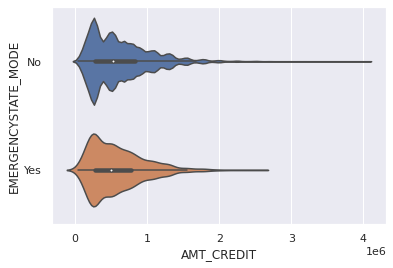

In [24]:
violinplot(application_train_df,
           ['EMERGENCYSTATE_MODE', 'AMT_CREDIT'])

## C. Descriptions

In [25]:
description_df = pd.read_csv(PATH + 'data/description_df.csv',
                             sep=';',
                             encoding="latin1")

In [26]:
description_df.head(5)

,Colonne1,Unnamed: 0,Table,Row,Description,Special,ROG,Reason
0,0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN,G,Relevant
1,1,2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN,G,Relevant
2,2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN,O,NaN
3,3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN,O,To be used with caution
4,4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN,G,In case of insolvancy


In [27]:
application_train_df[application_train_df['FLAG_WORK_PHONE']!=application_train_df['FLAG_PHONE']].head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,17.0,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,8.0,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,-20417,365243,-5246.0,-2512,NaN,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2396.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [28]:
application_test_df[application_test_df['FLAG_WORK_PHONE']!=application_test_df['FLAG_PHONE']].head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.025164,-18604,-12009,-6116.0,-2027,10.0,1,1,0,1,1,0,Drivers,2.0,2,2,MONDAY,15,0,0,0,0,0,0,Government,...,0.1975,0.2258,0.0116,0.0746,not specified,block of flats,0.2151,Block,No,0.0,0.0,0.0,0.0,-1705.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
10,100074,Cash loans,F,N,Y,0,67500.0,675000.0,25447.5,675000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.003122,-23670,365243,-7490.0,-4136,NaN,1,0,0,1,1,0,NaN,2.0,3,3,TUESDAY,11,0,0,0,0,0,0,XNA,...,NaN,0.0115,NaN,NaN,NaN,block of flats,0.0136,"Stone, brick",No,0.0,0.0,0.0,0.0,-1671.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
16,100109,Cash loans,F,Y,Y,0,202500.0,407520.0,26041.5,360000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.007020,-19375,-4739,-3035.0,-2895,11.0,1,1,1,1,0,0,Laborers,1.0,2,2,SATURDAY,15,0,0,0,0,0,0,Services,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2154.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [29]:
description_df[description_df['Table']=='bureau.csv']

,Colonne1,Unnamed: 0,Table,Row,Description,Special,ROG,Reason
122,122,125,bureau.csv,SK_ID_CURR,"ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau",hashed,G,Relevant
123,123,126,bureau.csv,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application),hashed,G,Relevant
124,124,127,bureau.csv,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,NaN,G,Relevant
125,125,128,bureau.csv,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded,G,Relevant
126,126,129,bureau.csv,DAYS_CREDIT,How many days before current application did client apply for Credit Bureau credit,time only relative to the application,O,Use unclear
127,127,130,bureau.csv,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the time of application for related loan in our sample,NaN,O,Use unclear
128,128,131,bureau.csv,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at the time of application in Home Credit,time only relative to the application,O,Use unclear
129,129,132,bureau.csv,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of application in Home Credit (only for closed credit),time only relative to the application,O,Use unclear
130,130,133,bureau.csv,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample),NaN,G,Relevant
131,131,134,bureau.csv,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit prolonged,NaN,G,Relevant


In [30]:
# Save the list of all categorical features.
# Will be useful for communication of their importance in the dashboard
cat_col = []
for df in my_dataset:
    for col in df.columns:
        if type(df[col][0]) == type('') and df[col].nunique() != 2:
            cat_col.append(col)
# Save the data for further use
col_df = pd.DataFrame(cat_col, columns=['Categorical feature name'])
col_df.to_csv(PATH + 'data/' + 'categorical_features.csv')

## D. NaN proportion

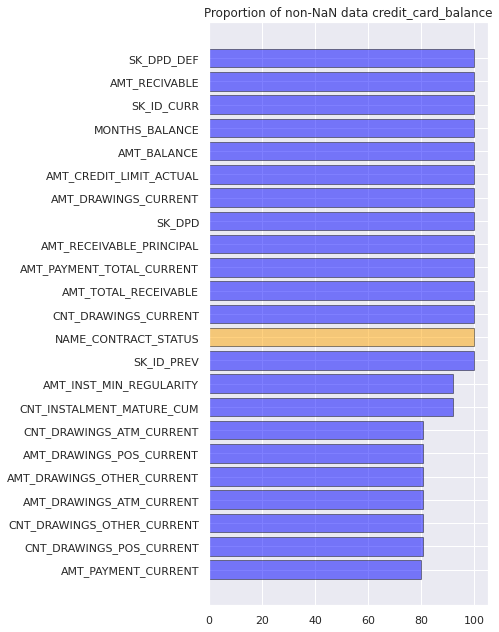

In [31]:
explorator.nan_proportion_features(my_dataset[7])

# **III. Feature engineering**

## A. Features considered as useless

### 1) Pre-treatment of description_df

In [32]:
description_df.head(3)

,Colonne1,Unnamed: 0,Table,Row,Description,Special,ROG,Reason
0,0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN,G,Relevant
1,1,2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN,G,Relevant
2,2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN,O,NaN


In [33]:
# Handling of 'application_{train|test}.csv', to be turned to:
# - application_train.csv
# - application_test.csv
description_df = pd.read_csv(PATH + 'data/description_df.csv',sep=';',encoding="latin1")
# Get the rows concerning application_train_df & application_test_df
descr_app_df = description_df[description_df['Table']=='application_{train|test}.csv']
# Drop these rows from original dataframe
description_df = description_df[description_df['Table']!='application_{train|test}.csv']
# Handling train df
descr_app_train_df = descr_app_df.copy()
descr_app_train_df['Table'] = ['application_train.csv'] * descr_app_df.shape[0]
# Handling test df
descr_app_test_df = descr_app_df.copy()
descr_app_test_df['Table'] = ['application_test.csv'] * descr_app_df.shape[0]
# Concatenate the three dataframes
description_df = description_df.append(descr_app_train_df)
description_df = description_df.append(descr_app_test_df)

In [34]:
description_df['Table'].unique()

array(['bureau.csv', 'bureau_balance.csv', 'POS_CASH_balance.csv',
       'credit_card_balance.csv', 'previous_application.csv',
       'installments_payments.csv', 'application_train.csv',
       'application_test.csv'], dtype=object)

### 2) Handling useless features

In [35]:
def drop_sec_col(df, descr_df, descr_feat):
    '''
    Some features are considered as useless and must be removed.
    This method drops these columns from the given 'df' dataframe.
    
    Pre-requisites:
    - descr_df contains the list of features.
    - the descr_df must contain a 'ROG' column, identifying the features to drop
    as 'R' (for 'Red'). 'O' stands for 'Orange' and 'G' for 'Green'.
    '''
    # Get the list of features to be dropped
    t_df = descr_df[descr_df['ROG']=='R']
    t_df = t_df[t_df[descr_feat]==df.name+'.csv']
    drop_list = t_df['Row']
    # Drop the features one by one
    for column in drop_list:
        df.drop(column, axis=1, inplace=True)
    return df

In [36]:
if False:
    application_train_df = drop_sec_col(my_dataset[0], description_df, 'Table')
    application_test_df = drop_sec_col(my_dataset[1], description_df, 'Table')
    bureau_df = drop_sec_col(my_dataset[2], description_df, 'Table')
    bureau_balance_df = drop_sec_col(my_dataset[3], description_df, 'Table')
    previous_application_df = drop_sec_col(my_dataset[4], description_df, 'Table')
    POS_CASH_balance_df = drop_sec_col(my_dataset[5], description_df, 'Table')
    installments_payments_df = drop_sec_col(my_dataset[6], description_df, 'Table')
    credit_card_balance_df = drop_sec_col(my_dataset[7], description_df, 'Table')

In [37]:
new_explorator = std_eda.Eda_Explorator(my_dataset)
if False:
    new_explorator.dataset_plot()

## B. Fusion

### 1) Branch 1: bureau

**bureau_balance_df**

In [38]:
# Warning: approximately 10 hours computation
# Reducing bureau_balance_df to one row per SK_BUREAU_ID
if False:
    n_bureau_balance_ndf = pd.DataFrame(columns=['Month count', 'C closed', 'X status unknown',
                                '0 no DPD', '1 DPD 1-30', '2 DPD 31-60',
                                '3 DPD 61-90', '4 DPD 91-120', '5 DPD > 120'])
    col_list = [name[0] for name in list(n_bureau_balance_ndf.columns)[:-1]]
    SK_BUREAU_IDS = bureau_balance_ndf['SK_ID_BUREAU'].unique()
    i=1
    for id in SK_BUREAU_IDS:
        i += 1
        print(i, '/', len(SK_BUREAU_IDS))
        # Filter the original dataframe
        id_df = bureau_balance_ndf[bureau_balance_ndf['SK_ID_BUREAU']==id]
        # Get the number of months
        id_month_cnt = id_df.shape[0]
        # Count the occurences of values
        id_dict = dict(Counter(id_df['STATUS']))
        # Creation of the row specific to the bureau_id
        row = [id_month_cnt]
        for col in col_list:
            if col in id_dict.keys():
                row.append(id_dict[col])
            else:
                row.append(0)
        n_bureau_balance_ndf.loc[id] = row
    n_bureau_balance_ndf = n_bureau_balance_ndf.astype(int)

In [39]:
# Save the dataframe just created


In [40]:
# ----------------------------------------------------------------
# Colonnes coming from the fusion with bureau_balance_ndf
# Month count
# C closed
# X status unknown
# 0 no DPD
# 1 DPD 1-30
# 2 DPD 31-60
# 3 DPD 61-90
# 4 DPD 91-120
# 5 DPD > 120

**bureau_df**

In [41]:
bureau_df.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [42]:
# Group by SK_ID_CURR
# 2) CREDIT ACTIVE: OneHotEncoding
bureau_df_v2 = pd.get_dummies(bureau_df, drop_first=False)

# 3) CREDIT CURRENCY: OneHotEncoding

# 4) DAYS_CREDIT: multiply by CREDIT_ACTIVE_Active
bureau_df_v2['CREDIT_ACTIVE_Active_days'] = bureau_df_v2['CREDIT_ACTIVE_Active'] * bureau_df_v2['DAYS_CREDIT']
bureau_df_v2['CREDIT_ACTIVE_Bad debt_days'] = bureau_df_v2['CREDIT_ACTIVE_Bad debt'] * bureau_df_v2['DAYS_CREDIT']
bureau_df_v2['CREDIT_ACTIVE_Closed_days'] = bureau_df_v2['CREDIT_ACTIVE_Closed'] * bureau_df_v2['DAYS_CREDIT']
bureau_df_v2['CREDIT_ACTIVE_Sold_days'] = bureau_df_v2['CREDIT_ACTIVE_Sold'] * bureau_df_v2['DAYS_CREDIT']
# Drop the original feature
bureau_df_v2.drop('DAYS_CREDIT', axis=1, inplace=True)

# 6) DAYS_CREDIT_ENDDATE: in the original, replace the NaN by 0
bureau_df_v2['DAYS_CREDIT_ENDDATE'].replace(np.nan, 0, inplace=True)
# Multiplier par CREDIT_ACTIVE_Active
bureau_df_v2['DAYS_CREDIT_ENDDATE_new'] = bureau_df_v2['DAYS_CREDIT_ENDDATE'] * bureau_df_v2['CREDIT_ACTIVE_Active']

# 7) DAYS_ENDDATE_FACT: in the original, replace the NaN by 0
bureau_df_v2['DAYS_ENDDATE_FACT'].replace(np.nan, 0, inplace=True)
# Multiplier par CREDIT_ACTIVE_Closed
bureau_df_v2['DAYS_ENDDATE_Delay'] = bureau_df_v2['DAYS_ENDDATE_FACT'] * bureau_df_v2['CREDIT_ACTIVE_Closed']
# Calculer la différence avec DAYS_CREDIT_ENDDATE : retard ou avance dans le
# remboursement total du crédit
bureau_df_v2['DAYS_ENDDATE_Delay'] -= bureau_df_v2['DAYS_CREDIT_ENDDATE']
# Drop the original feature
bureau_df_v2.drop('DAYS_ENDDATE_FACT', axis=1, inplace=True)

# 6) DAYS_CREDIT_ENDDATE: Drop the original feature
bureau_df_v2.drop('DAYS_CREDIT_ENDDATE', axis=1, inplace=True)

# 8) AMT_CREDIT_MAX_OVERDUE: replace the NaN by 0
bureau_df_v2['AMT_CREDIT_MAX_OVERDUE'].replace(np.nan, 0, inplace=True)

# 12) AMT_CREDIT_SUM_LIMIT: replace the NaN by 0
bureau_df_v2['AMT_CREDIT_SUM_LIMIT'].replace(np.nan, 0, inplace=True)
bureau_df_v2['AMT_CREDIT_SUM_OVERDUE'].replace(np.nan, 0, inplace=True)
# Compute the difference AMT_CREDIT_SUM_DIFF with
# 13) AMT_CREDIT_SUM_OVERDUE in order to identify the outdated credits.
bureau_df_v2['AMT_CREDIT_SUM_DIFF'] = bureau_df_v2['AMT_CREDIT_SUM_OVERDUE'] - bureau_df_v2['AMT_CREDIT_SUM_LIMIT']
# Drop the original features
bureau_df_v2.drop('AMT_CREDIT_SUM_LIMIT', axis=1, inplace=True)
bureau_df_v2.drop('AMT_CREDIT_SUM_OVERDUE', axis=1, inplace=True)

# 14) CREDIT_TYPE: OneHotEncoding on ID_BUREAU

# Replace the NaN by 0
bureau_df_v2.replace(np.nan, 0, inplace= True)

In [43]:
# Sommer le reste
bureau_df_v2 = bureau_df_v2.groupby(by='SK_ID_CURR').sum()

In [44]:
bureau_df_v2.head(3)

,SK_ID_BUREAU,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,CREDIT_ACTIVE_Active_days,CREDIT_ACTIVE_Bad debt_days,CREDIT_ACTIVE_Closed_days,CREDIT_ACTIVE_Sold_days,DAYS_CREDIT_ENDDATE_new,DAYS_ENDDATE_Delay,AMT_CREDIT_SUM_DIFF
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,41276431,0,0.000,0,1453365.000,596686.5,-652,24817.5,3,0,4,0,7,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,-928,0,-4217,0,3091.0,-3879.0,0.000
100002,49226177,0,8405.145,0,865055.565,245781.0,-3999,0.0,2,0,6,0,8,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0,0,0,0,-1145,0,-5847,0,780.0,-2091.0,-31988.565
100003,23543514,0,0.000,0,1017400.500,0.0,-3264,0.0,1,0,3,0,4,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,-606,0,-4997,0,1216.0,-1114.0,-810000.000


**Fusion with train set**

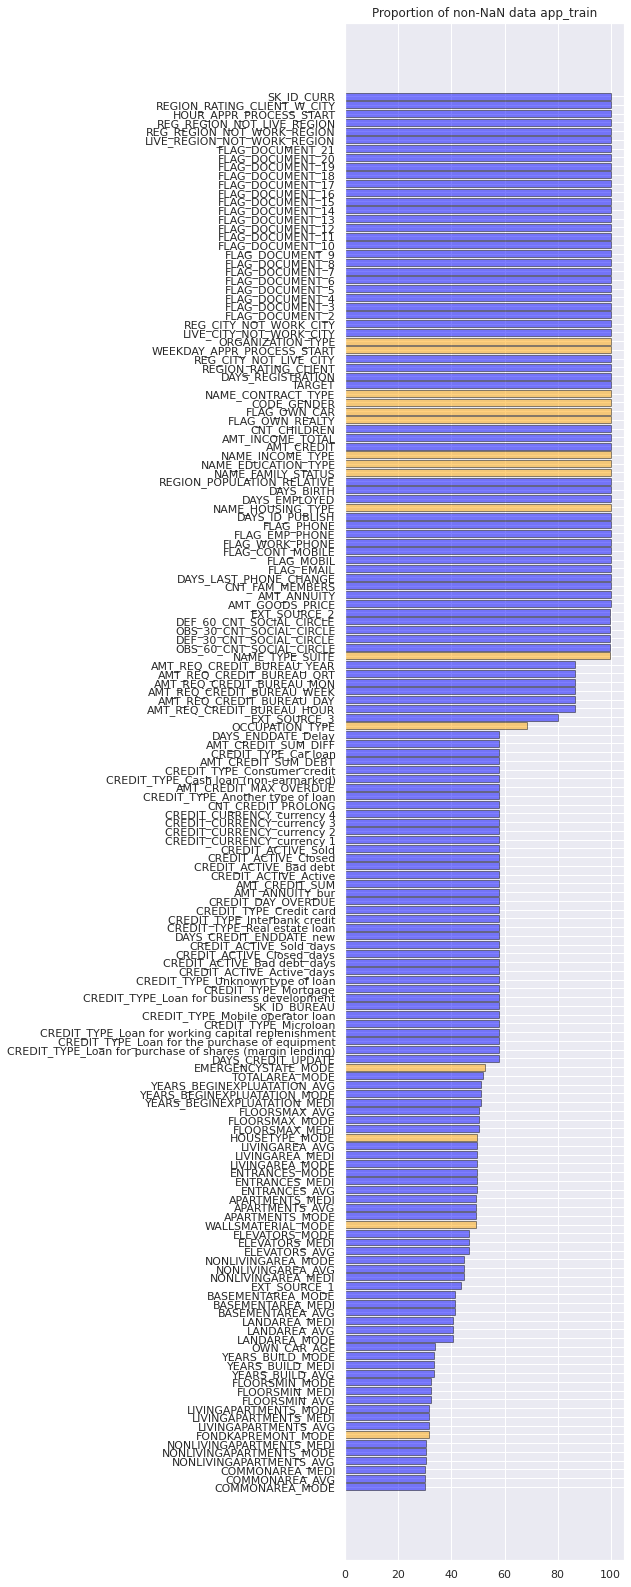

In [45]:
# Memory optimisation
bureau_df_v2 = new_explorator.optimize_floats(bureau_df_v2)
bureau_df_v2 = new_explorator.optimize_ints(bureau_df_v2)
# Fusion
application_train_df = pd.merge(left=application_train_df,
                                right=bureau_df_v2,
                                left_index=True,
                                right_index=True,
                                how='left',
                                suffixes=('', '_bur',))
# NaN status
application_train_df.name = 'app_train'
new_explorator.nan_proportion_features(application_train_df)

**Fusion with test set**

In [46]:
# Fusion
application_test_df = pd.merge(left=application_test_df,
                               right=bureau_df_v2,
                               left_index=True,
                               right_index=True,
                               how='left',
                               suffixes=('', '_bur',))

### 2) Branch 2: without previous applications

In [47]:
# Identification of ID_CURR no present in previous_application_df
def separate_on_key(df_0, df_1, key):
    '''
    Given a df_1 dataframe, look for its keys that are NOT present in the df_0
    dataframe.
    Return two dataframes:
    - the 1st one contains the keys PRESENT IN df_0
    - the 2nd one contains the keys ABSENT FROM df_0
    '''
    # Get the list of unique keys for both dataframes
    try:
        list_0 = df_0[key].unique()
        list_1 = df_1[key].unique()
    except KeyError:
        list_0 = df_0.index
        list_1 = df_1.index
    # Get the list of unique keys present in df_1 but not in df_0
    specific_list = list(set(list_1).difference(set(list_0)))
    # Form the new dataframes
    df_with = df_1[df_1[key].isin(specific_list)]
    df_without = df_1[~df_1[key].isin(specific_list)]
    return df_without, df_with


def merge_direct(prim_df, direct_df, direct_key, inter_df, inter_key):
    '''
    - prim_df is the dataframe we want to merge with:
    - direct_df,
    - inter_df shares some keys with df, that we do not want to add to the merge.
    - key is the merge key.
    df_join is the dataframe resulting from the double filtering.
    '''
    # Consider the keys ABSENT from inter_df 
    _, df_join = separate_on_key(inter_df,
                                 prim_df,
                                 direct_key)
    # Consider the keys PRESENT in direct_df
    df_join, _ = separate_on_key(direct_df,
                                 df_join,
                                 direct_key)
    # Process the dataframe only on the keys present in direct_df
    df_join = pd.get_dummies(df_join)
    df_join = df_join.groupby(by=direct_key).sum()
    df_join.drop(inter_key, axis=1, inplace=True)
    # Set correct index
    if direct_df.index.name != direct_key:
        direct_df.set_index(direct_key, inplace=True)
    # Merge the prepared dataframes
    direct_df = pd.merge(left=direct_df,
                       right=df_join,
                       left_index=True,
                       right_index=True,
                       how='left',
                       suffixes=('_direct', '_prim',))
    return direct_df

**POS_CASH_balance**

In [48]:
# 1) CNT_INSTALMENT_FUTURE: Sum
# 2) NAME_CONTRACT_STATUS: OneHotEncoding, Sum
# 3) SK_DPD: Sum
# Merge
application_train_df = merge_direct(POS_CASH_balance_df,
                                    application_train_df, 'SK_ID_CURR',
                                    previous_application_df, 'SK_ID_PREV')
application_test_df = merge_direct(POS_CASH_balance_df,
                                   application_test_df, 'SK_ID_CURR',
                                   previous_application_df, 'SK_ID_PREV')

**instalments_payments**

In [49]:
# 1) NUM_INSTALMENT_VERSION: sum
# 3) DAYS_INSTALMENT: difference with DAYS_ENTRY_PAYMENT
# 4) DAYS_ENTRY_PAYMENT: difference with DAYS_INSTALMENT
installments_payments_df['DAYS_DIFF'] = installments_payments_df['DAYS_ENTRY_PAYMENT'] - installments_payments_df['DAYS_INSTALMENT']
installments_payments_df.drop('DAYS_ENTRY_PAYMENT', axis=1, inplace=True)
installments_payments_df.drop('DAYS_INSTALMENT', axis=1, inplace=True)
# 5) AMT_INSTALMENT: difference with AMT_PAYMENT
# 6) AMT_PAYMENT: difference with AMT_INSTALMENT
installments_payments_df['AMT_DIFF'] = installments_payments_df['AMT_PAYMENT'] - installments_payments_df['AMT_INSTALMENT']
installments_payments_df.drop('AMT_INSTALMENT', axis=1, inplace=True)
# Merge
application_train_df = merge_direct(installments_payments_df,
                                    application_train_df, 'SK_ID_CURR',
                                    previous_application_df, 'SK_ID_PREV')
application_test_df = merge_direct(installments_payments_df,
                                   application_test_df, 'SK_ID_CURR',
                                   previous_application_df, 'SK_ID_PREV')

**credit_card_balance**

In [50]:
# 0) SK_ID_PREV
# 2) AMT_BALANCE: sum
# 5) AMT_PAYMENT_CURRENT: sum
# 10) NAME_CONTRACT_STATUS: OneHotEncoding
# 11) SK_DPD: Sum
# 12) SK_DPD_DEF: Sum
# Merge
application_train_df = merge_direct(credit_card_balance_df,
                                    application_train_df, 'SK_ID_CURR',
                                    previous_application_df, 'SK_ID_PREV')
application_test_df = merge_direct(credit_card_balance_df,
                                   application_test_df, 'SK_ID_CURR',
                                   previous_application_df, 'SK_ID_PREV')

### 3) Branch 3: with previous application

**Fusion with previous_application**

In [51]:
def set_double_key(df, key_1, key_2):
    '''
    Set double-key (ID_CURR, ID_PREV) for the 4 dataframes before their merging.
    '''
    df.reset_index(inplace=True)
    keys_1 = df[key_1]
    keys_2 = df[key_2]
    df.set_index([keys_1, keys_2], inplace=True)
    df.drop(key_1, axis=1, inplace=True)
    df.drop(key_2, axis=1, inplace=True)
    return df


def merge_intermediate(df, inter_df, inter_key, direct_key):
    '''
    inter_df and inter_key concern the dataframe to which we merge df.
    direct_key is the key of the future dataframe to be merged with.
    '''
    # Consider the keys ABSENT from disjoin_df 
    inter_df.reset_index(inplace=True)
    inter_df.set_index(inter_key, inplace=True)
    df_join, _ = separate_on_key(inter_df,
                                 df,
                                 direct_key)
    df_join = pd.get_dummies(df_join)
    df_join.drop(direct_key, axis=1, inplace=True)
    df_join = df_join.groupby(by=inter_key).sum()
    # Merge    
    inter_df = pd.merge(left=inter_df,
                        right=df_join,
                        left_index=True,
                        right_index=True,
                        how='left',
                        suffixes=('_inter', '_prim',))
    inter_df.reset_index(inplace=True)
    inter_df.set_index(direct_key, inplace=True)
    return inter_df

In [52]:
# Pre-treatment
# previous_application_df
# NAME_CONTRACT_TYPE feature is present in both dataframes previous_application_df
# and application_train_df. They must be differenciated.
previous_application_df['NAME_CONTRACT_TYPE_prev'] = previous_application_df['NAME_CONTRACT_TYPE']
previous_application_df.drop('NAME_CONTRACT_TYPE', axis=1, inplace=True)
# OneHotEncoding
previous_application_df = pd.get_dummies(previous_application_df)
# Memory optimization
previous_application_df = new_explorator.optimize_floats(previous_application_df)
previous_application_df = new_explorator.optimize_ints(previous_application_df)
# Merge
# POS_CASH
previous_application_df = merge_intermediate(POS_CASH_balance_df,
                                             previous_application_df,
                                             'SK_ID_PREV',
                                             'SK_ID_CURR')
# instalments_payments
previous_application_df = merge_intermediate(installments_payments_df,
                                             previous_application_df,
                                             'SK_ID_PREV',
                                             'SK_ID_CURR')
# credit_card
previous_application_df = merge_intermediate(credit_card_balance_df,
                                             previous_application_df,
                                             'SK_ID_PREV',
                                             'SK_ID_CURR')

**Handling NaN values**

In [53]:
# AMT_ANNUITY
previous_application_df['AMT_ANNUITY'].replace(np.nan, 0, inplace=True)
# AMT_CREDIT: only one row with np.nan
previous_application_df = previous_application_df[previous_application_df['SK_ID_PREV']!=2204450]
# AMT_DOWN_PAYMENT: lots of values are already equal to 0
previous_application_df['AMT_DOWN_PAYMENT'].replace(np.nan, 0, inplace=True)
# AMT_RATE_PAYMENT: lots of values are already equal to 0
previous_application_df['RATE_DOWN_PAYMENT'].replace(np.nan, 0, inplace=True)
# RATE_INTEREST_PRIMARY: great majority of NaN values.
# Cannot be easily replaced. Related to next feature RATE_INTEREST_PRIVILEGED.
previous_application_df['RATE_improvement'] = previous_application_df['RATE_INTEREST_PRIVILEGED'] - previous_application_df['RATE_INTEREST_PRIMARY']
temp_mean = previous_application_df['RATE_INTEREST_PRIMARY'].mean()
previous_application_df['RATE_INTEREST_PRIVILEGED'].replace(np.nan, temp_mean, inplace=True)
previous_application_df['RATE_improvement'].replace(np.nan, 0, inplace=True)
previous_application_df.drop('RATE_INTEREST_PRIMARY', axis=1, inplace=True)
# CNT_PAYMENT: in order not to disadvantage the customer for which this
# information is available, the NaN cannot be replaced by 0. Better is to 
# replace them by the mean.
temp_mean = previous_application_df['CNT_PAYMENT'].mean()
previous_application_df['CNT_PAYMENT'].replace(np.nan, temp_mean, inplace=True)
# DAYS_FIRST_DRAWING
temp_mean = previous_application_df['DAYS_FIRST_DRAWING'].mean()
previous_application_df['DAYS_FIRST_DRAWING'].replace(np.nan, temp_mean, inplace=True)
# DAYS_TERMINATION: compute the mean would create false data. Better is to replace with 0.
previous_application_df['DAYS_TERMINATION'].replace(np.nan, 0, inplace=True)
# NFLAG_INSURED_ON_APPROVAL: with no information, better is to reaplce Nan by 0.
previous_application_df['NFLAG_INSURED_ON_APPROVAL'].replace(np.nan, 0, inplace=True)
# NUM_INSTALMENT_VERSION: great majority of nan values
previous_application_df.drop('NUM_INSTALMENT_VERSION', axis=1, inplace=True)
# AMT_PAYMENT: compute the mean would create false data. Better is to replace with 0.
previous_application_df['AMT_PAYMENT'].replace(np.nan, 0, inplace=True)
# DAYS_DIFF: compute the mean would create false data. Better is to replace with 0.
previous_application_df['DAYS_DIFF'].replace(np.nan, 0, inplace=True)
# AMT_DIFF: compute the mean would create false data. Better is to replace with 0.
previous_application_df['AMT_DIFF'].replace(np.nan, 0, inplace=True)
# AMT_BALANCE: only NaN values ?
previous_application_df['AMT_BALANCE'].replace(np.nan, 0, inplace=True)
# AMT_AMT_PAYMENT_CURRENT: only NaN values ?
previous_application_df['AMT_PAYMENT_CURRENT'].replace(np.nan, 0, inplace=True)
# SK_DPD: only NaN values ?
previous_application_df['SK_DPD_prim'].replace(np.nan, 0, inplace=True)
previous_application_df['SK_DPD_inter'].replace(np.nan, 0, inplace=True)
# SK_DPD_DEF: only NaN values ?
previous_application_df['SK_DPD_DEF_prim'].replace(np.nan, 0, inplace=True)
previous_application_df['SK_DPD_DEF_inter'].replace(np.nan, 0, inplace=True)
# NAME_CONTRACT_STATUS_Active
previous_application_df['NAME_CONTRACT_STATUS_Active_prim'].replace(np.nan, 0, inplace=True)
previous_application_df['NAME_CONTRACT_STATUS_Active_inter'].replace(np.nan, 0, inplace=True)
# NAME_CONTRACT_STATUS_Completed
previous_application_df['NAME_CONTRACT_STATUS_Completed_prim'].replace(np.nan, 0, inplace=True)
previous_application_df['NAME_CONTRACT_STATUS_Completed_inter'].replace(np.nan, 0, inplace=True)
# NAME_CONTRACT_STATUS_Signed
previous_application_df['NAME_CONTRACT_STATUS_Signed_prim'].replace(np.nan, 0, inplace=True)
previous_application_df['NAME_CONTRACT_STATUS_Signed_inter'].replace(np.nan, 0, inplace=True)
#
#
# Preparing for fusion with application sets
previous_application_df = previous_application_df.groupby(by='SK_ID_CURR').sum()

In [54]:
for col in previous_application_df.columns:
    if col[:20] == 'NAME_CONTRACT_STATUS':
        print(col)

NAME_CONTRACT_STATUS_Approved_inter
NAME_CONTRACT_STATUS_Canceled_inter
NAME_CONTRACT_STATUS_Refused_inter
NAME_CONTRACT_STATUS_Unused offer
NAME_CONTRACT_STATUS_Active_inter
NAME_CONTRACT_STATUS_Amortized debt
NAME_CONTRACT_STATUS_Approved_prim
NAME_CONTRACT_STATUS_Canceled_prim
NAME_CONTRACT_STATUS_Completed_inter
NAME_CONTRACT_STATUS_Demand_inter
NAME_CONTRACT_STATUS_Returned to the store
NAME_CONTRACT_STATUS_Signed_inter
NAME_CONTRACT_STATUS_XNA
NAME_CONTRACT_STATUS_Active_prim
NAME_CONTRACT_STATUS_Approved
NAME_CONTRACT_STATUS_Completed_prim
NAME_CONTRACT_STATUS_Demand_prim
NAME_CONTRACT_STATUS_Refused_prim
NAME_CONTRACT_STATUS_Sent proposal
NAME_CONTRACT_STATUS_Signed_prim


**Fusion with train set**

In [55]:
# Transform categorical variables
application_train_df = pd.get_dummies(application_train_df)
# Merge
application_train_df = pd.merge(left=application_train_df,
                                right=previous_application_df,
                                how='left',
                                left_index=True,
                                right_index=True,
                                suffixes=('','_prev'))
# Transform
application_train_df.columns = application_train_df.columns.str.replace(' ','_')
# Optimize dataframe size
application_train_df = new_explorator.optimize_floats(application_train_df)
application_train_df = new_explorator.optimize_ints(application_train_df)
application_train_df.shape

(307511, 520)

**Fusion with test set**

In [56]:
# Transform categorical variables
application_test_df = pd.get_dummies(application_test_df)
# Merge
application_test_df = pd.merge(left=application_test_df,
                                right=previous_application_df,
                                how='left',
                                left_index=True,
                                right_index=True,
                                suffixes=('','_prev'))
# Transform
application_test_df.columns = application_test_df.columns.str.replace(' ','_')
# Optimize dataframe size
application_test_df = new_explorator.optimize_floats(application_test_df)
application_test_df = new_explorator.optimize_ints(application_test_df)
application_test_df.shape

(48744, 514)

### 4) Features check

**Features to drop**

In [57]:
def additional_cleaning(df, drop_list=['SK_ID_BUREAU', 'SK_ID_PREV', 'index']):
    '''
    Designed for final train and test dataframes.
    '''
    #
    for feature in drop_list:
        df.drop(feature, axis=1, inplace=True)
    # FLAG_OWN_CAR
    df.rename(columns={'FLAG_OWN_CAR_Y':'FLAG_OWN_CAR'}, inplace=True)
    df.drop('FLAG_OWN_CAR_N', axis=1, inplace=True)
    # FLAG_OWN_REALTY
    df.rename(columns={'FLAG_OWN_REALTY_Y':'FLAG_OWN_REALTY'}, inplace=True)
    df.drop('FLAG_OWN_REALTY_N', axis=1, inplace=True)
    # EMERGENCYSTATE_MODE
    df.rename(columns={'EMERGENCYSTATE_MODE_Yes':'EMERGENCYSTATE_MODE'}, inplace=True)
    df.drop('EMERGENCYSTATE_MODE_No', axis=1, inplace=True)
    # FLAG_LAST_APPL_PER_CONTRACT
    df.rename(columns={'FLAG_LAST_APPL_PER_CONTRACT_Y':'FLAG_LAST_APPL_PER_CONTRACT'}, inplace=True)
    df.drop('FLAG_LAST_APPL_PER_CONTRACT_N', axis=1, inplace=True)

    for col in df.columns:
        if col[-4:] in ['_AVG', 'MODE']:
            df.drop(col, axis=1, inplace=True)

    return df

In [58]:
application_train_df = additional_cleaning(application_train_df)
application_test_df = additional_cleaning(application_test_df)

**Strange features handling**

In [59]:
# STRANGE or UNIQUE VALUE or OUTLIERS
# ------------------------------------------
# -> display .nunique() for all features
# -> print first 2 value_counts for all features
strange_list = ['CREDIT_DAY_OVERDUE',
'AMT_CREDIT_MAX_OVERDUE',
'AMT_ANNUITY_bur',
'AMT_ANNUITY',
'CREDIT_CURRENCY_currency_2',
'CREDIT_CURRENCY_currency_3',
'CREDIT_CURRENCY_currency_4',
'CREDIT_TYPE_Another_type_of_loan',
'CREDIT_TYPE_Interbank_credit',
'CREDIT_TYPE_Loan_for_business_development',
'CREDIT_TYPE_Loan_for_purchase_of_shares_(margin_lending)',
'CREDIT_TYPE_Loan_for_working_capital_replenishment',
'CREDIT_TYPE_Microloan',
'CREDIT_TYPE_Mobile_operator_loan',
'CREDIT_TYPE_Real_estate_loan',
'CREDIT_TYPE_Unknown_type_of_loan',
'CREDIT_ACTIVE_Bad_debt_days',
'CREDIT_ACTIVE_Sold_days',
'MONTHS_BALANCE_direct',
'CNT_INSTALMENT',
'CNT_INSTALMENT_FUTURE',
'SK_DPD_direct',
'SK_DPD_DEF_direct',
'NAME_CONTRACT_STATUS_Active_direct',
'NAME_CONTRACT_STATUS_Completed_direct',
'NAME_CONTRACT_STATUS_Demand',
'NAME_CONTRACT_STATUS_Returned_to_the_store',
'NUM_INSTALMENT_VERSION',
'NUM_INSTALMENT_NUMBER',
'AMT_PAYMENT',
'DAYS_DIFF',
'AMT_DIFF',
'AMT_BALANCE',
'NAME_GOODS_CATEGORY_Animals',
'NAME_CONTRACT_STATUS_Canceled_prim',
'NAME_CONTRACT_STATUS_Approved',
'NAME_CONTRACT_STATUS_Demand_prim',
'NAME_CONTRACT_STATUS_Refused_prim',
'NAME_CONTRACT_STATUS_Sent_proposal']

strange_dict = {}
for feature in strange_list:
    strange_dict[feature] = application_train_df[feature].nunique()
strange_dict

{'AMT_ANNUITY': 13672,
 'AMT_ANNUITY_bur': 32430,
 'AMT_BALANCE': 613,
 'AMT_CREDIT_MAX_OVERDUE': 35293,
 'AMT_DIFF': 399,
 'AMT_PAYMENT': 1506,
 'CNT_INSTALMENT': 146,
 'CNT_INSTALMENT_FUTURE': 84,
 'CREDIT_ACTIVE_Bad_debt_days': 12,
 'CREDIT_ACTIVE_Sold_days': 2039,
 'CREDIT_CURRENCY_currency_2': 7,
 'CREDIT_CURRENCY_currency_3': 4,
 'CREDIT_CURRENCY_currency_4': 2,
 'CREDIT_DAY_OVERDUE': 624,
 'CREDIT_TYPE_Another_type_of_loan': 5,
 'CREDIT_TYPE_Interbank_credit': 2,
 'CREDIT_TYPE_Loan_for_business_development': 8,
 'CREDIT_TYPE_Loan_for_purchase_of_shares_(margin_lending)': 2,
 'CREDIT_TYPE_Loan_for_working_capital_replenishment': 5,
 'CREDIT_TYPE_Microloan': 34,
 'CREDIT_TYPE_Mobile_operator_loan': 2,
 'CREDIT_TYPE_Real_estate_loan': 2,
 'CREDIT_TYPE_Unknown_type_of_loan': 4,
 'DAYS_DIFF': 610,
 'MONTHS_BALANCE_direct': 107,
 'NAME_CONTRACT_STATUS_Active_direct': 57,
 'NAME_CONTRACT_STATUS_Approved': 2,
 'NAME_CONTRACT_STATUS_Canceled_prim': 2,
 'NAME_CONTRACT_STATUS_Completed_dir

In [60]:
# Feature with many different value
strange_list.remove('AMT_ANNUITY_bur')
strange_list.remove('AMT_CREDIT_MAX_OVERDUE')

# Features with two unique values
strange_drop_list = ['CREDIT_CURRENCY_currency_4',
                     'CREDIT_TYPE_Interbank_credit',
                     'CREDIT_TYPE_Loan_for_purchase_of_shares_(margin_lending)',
                     'CREDIT_TYPE_Mobile_operator_loan',
                     'CREDIT_TYPE_Real_estate_loan',
                     'NAME_CONTRACT_STATUS_Approved',
                     'NAME_CONTRACT_STATUS_Demand_prim',
                     'NAME_CONTRACT_STATUS_Refused_prim',
                     'NAME_GOODS_CATEGORY_Animals',
                     'CREDIT_CURRENCY_currency_3',
                     'CREDIT_TYPE_Another_type_of_loan',
                     'CREDIT_TYPE_Loan_for_working_capital_replenishment',
                     'NAME_CONTRACT_STATUS_Canceled_prim',
                     'NAME_CONTRACT_STATUS_Sent_proposal',
                     'SK_DPD_DEF_direct',
                     'SK_DPD_direct']
for feature in strange_drop_list:
    application_train_df.drop(feature, axis=1, inplace=True)
    application_test_df.drop(feature, axis=1, inplace=True)
    strange_list.remove(feature)

# Special handling
application_train_df.drop('NAME_CONTRACT_STATUS_Returned_to_the_store',
                          axis=1, inplace=True)
application_test_df.drop('NAME_CONTRACT_STATUS_Returned_to_the_store',
                          axis=1, inplace=True)
strange_list.remove('NAME_CONTRACT_STATUS_Returned_to_the_store')
application_train_df.drop('NAME_CONTRACT_STATUS_Demand',
                          axis=1, inplace=True)
strange_list.remove('NAME_CONTRACT_STATUS_Demand')
# Features to be transformed through log(x)
strange_list.remove('AMT_BALANCE')
strange_list.remove('AMT_PAYMENT')
strange_list.remove('CNT_INSTALMENT_FUTURE')
strange_list.remove('CNT_INSTALMENT')
strange_list.remove('CREDIT_DAY_OVERDUE')
strange_list.remove('CREDIT_TYPE_Microloan')
strange_list.remove('NUM_INSTALMENT_VERSION')
# Features to be transformed through 1 - log(1-x)
strange_list.remove('AMT_DIFF')
strange_list.remove('CREDIT_ACTIVE_Sold_days')

# Features strange, but important for credit problematics
strange_list.remove('CREDIT_ACTIVE_Bad_debt_days')
strange_list.remove('CREDIT_TYPE_Unknown_type_of_loan')
strange_list.remove('MONTHS_BALANCE_direct')
strange_list.remove('NAME_CONTRACT_STATUS_Active_direct')

# Features finally not so strange
strange_list.remove('CREDIT_CURRENCY_currency_2')
strange_list.remove('CREDIT_TYPE_Loan_for_business_development')
strange_list.remove('DAYS_DIFF')
strange_list.remove('NAME_CONTRACT_STATUS_Completed_direct')
strange_list.remove('NUM_INSTALMENT_NUMBER')

In [61]:
application_train_df.drop('CODE_GENDER_XNA', axis=1, inplace=True)

### 5) Similar features

In [62]:
for col in application_train_df.columns:
    if 'AMT_ANNUITY' in col:
        print(col, len(application_train_df[col].dropna()))

AMT_ANNUITY 307499
AMT_ANNUITY_bur 178229
AMT_ANNUITY_prev 291057


(array([2.5790e+03, 2.3483e+04, 3.3317e+04, 3.6509e+04, 3.9764e+04,
        4.3264e+04, 3.2583e+04, 2.5232e+04, 2.1393e+04, 1.3648e+04,
        1.1864e+04, 7.7600e+03, 5.8050e+03, 2.7460e+03, 2.2280e+03,
        2.2430e+03, 9.4300e+02, 4.4600e+02, 3.4700e+02, 2.4300e+02,
        2.4300e+02, 2.1000e+02, 1.4300e+02, 8.2000e+01, 6.6000e+01,
        9.5000e+01, 5.4000e+01, 2.1000e+01, 3.1000e+01, 3.5000e+01,
        2.6000e+01, 1.5000e+01, 0.0000e+00, 7.0000e+00, 1.1000e+01,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 4.0000e+00,
        9.0000e+00, 5.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 5.0000e+00,
        2.0000e+00, 1.0000e+00, 2.3000e+01, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1615.5,   5889. ,  10162.5,  14436. ,  18709.5,  22983. ,
         27256.5,  31530. ,  35803.5,  40077. ,  44350.5,  48624. ,
         52897.5,  57171. ,  61444.5,  65718. 

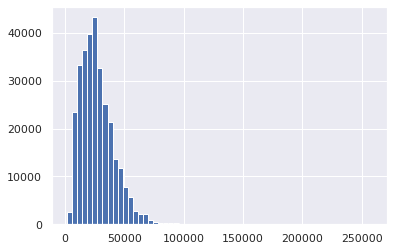

In [63]:
plt.hist(application_train_df['AMT_ANNUITY'], bins=60)

(array([1.39839e+05, 6.78060e+04, 3.44770e+04, 1.87450e+04, 1.09370e+04,
        6.53100e+03, 4.07300e+03, 2.68800e+03, 1.70400e+03, 1.14400e+03,
        8.07000e+02, 6.14000e+02, 3.85000e+02, 3.12000e+02, 2.07000e+02,
        1.57000e+02, 1.40000e+02, 1.21000e+02, 6.70000e+01, 7.00000e+01,
        4.40000e+01, 4.00000e+01, 2.40000e+01, 2.50000e+01, 1.40000e+01,
        1.70000e+01, 1.50000e+01, 5.00000e+00, 6.00000e+00, 9.00000e+00,
        7.00000e+00, 4.00000e+00, 1.00000e+00, 7.00000e+00, 2.00000e+00,
        0.00000e+00, 4.00000e+00, 2.00000e+00, 2.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([      0.   ,   34185.043,   68370.086,  102555.13 ,  136740.17 ,
         170925.22 ,  205110.27 ,  239295.31 ,  2

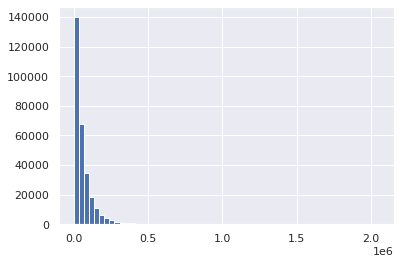

In [64]:
plt.hist(application_train_df['AMT_ANNUITY_prev'], bins=60)

(array([1.78073e+05, 8.60000e+01, 2.60000e+01, 1.10000e+01, 1.30000e+01,
        4.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 2.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.00000000e+00, 1.97892512e+06, 3.95785025e+06, 5.93677500e+06,
        7.91570050e+06, 9.89462500e+06, 1.18735500

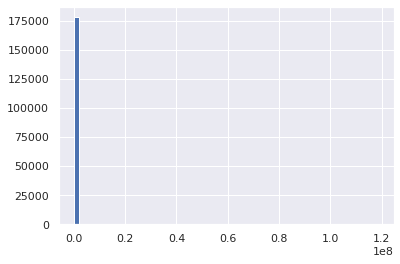

In [65]:
plt.hist(application_train_df['AMT_ANNUITY_bur'], bins=60)

## C. NaN values

In [66]:
# Hidden NaN values
hidden_nan_list = ['NAME_CASH_LOAN_PURPOSE_XAP', 'CODE_REJECT_REASON_XAP',
                   'NAME_CONTRACT_STATUS_XNA', 'FONDKAPREMONT_MODE_not_specified',
                   'ORGANIZATION_TYPE_XNA']
for col in hidden_nan_list:
    application_train_df.drop(col, axis=1, inplace=True)
    application_test_df.drop(col, axis=1, inplace=True)

In [67]:
def nan_handling(df):
    '''
    Specific function, project home credit.
    '''
    # OWN_CAR_AGE
    temp_mean = df['OWN_CAR_AGE'].mean()
    df['OWN_CAR_AGE'].replace(np.nan, temp_mean, inplace=True)
    # DAYS_LAST_PHONE_CHANGE
    temp_mean = df['DAYS_LAST_PHONE_CHANGE'].mean()
    df['DAYS_LAST_PHONE_CHANGE'].replace(np.nan, temp_mean, inplace=True)
    # EXTERNAL_SOURCE_1
    temp_mean = df['EXT_SOURCE_1'].mean()
    df['EXT_SOURCE_1'].replace(np.nan, temp_mean, inplace=True)
    # EXTERNAL_SOURCE_3
    temp_mean = df['EXT_SOURCE_3'].mean()
    df['EXT_SOURCE_3'].replace(np.nan, temp_mean, inplace=True)
    # All feature finishing with '_MEDI'
    MEDI_cols = [col for col in df.columns if col[-5:]=='_MEDI']
    for col in MEDI_cols:
        temp_medi = df[col].median()
        df[col].replace(np.nan, temp_medi, inplace=True)
    df.replace(np.nan, 0, inplace=True)
    return df

**Train set**

In [68]:
application_train_df.name = 'app_train'
if False:
    new_explorator.nan_proportion_features(application_train_df)

In [69]:
# Remove outliers
application_train_df.drop(index=377322, inplace=True)
application_train_df.drop(index=296262, inplace=True)
application_train_df = nan_handling(application_train_df)
application_train_df.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,...,MONTHS_BALANCE_inter,CNT_INSTALMENT_prev,CNT_INSTALMENT_FUTURE_prev,SK_DPD_inter,SK_DPD_DEF_inter,NAME_CONTRACT_STATUS_Active_inter,NAME_CONTRACT_STATUS_Amortized_debt,NAME_CONTRACT_STATUS_Approved_prim,NAME_CONTRACT_STATUS_Completed_inter,NAME_CONTRACT_STATUS_Demand_inter,NAME_CONTRACT_STATUS_Returned_to_the_store_prev,NAME_CONTRACT_STATUS_Signed_inter,NUM_INSTALMENT_NUMBER_prev,AMT_PAYMENT_prev,DAYS_DIFF_prev,AMT_DIFF_prev,MONTHS_BALANCE_prim_prev,AMT_BALANCE_prev,AMT_CREDIT_LIMIT_ACTUAL_prev,AMT_DRAWINGS_ATM_CURRENT_prev,AMT_DRAWINGS_CURRENT_prev,AMT_DRAWINGS_OTHER_CURRENT_prev,AMT_DRAWINGS_POS_CURRENT_prev,AMT_INST_MIN_REGULARITY_prev,AMT_PAYMENT_CURRENT_prev,AMT_PAYMENT_TOTAL_CURRENT_prev,AMT_RECEIVABLE_PRINCIPAL_prev,AMT_RECIVABLE_prev,AMT_TOTAL_RECEIVABLE_prev,CNT_DRAWINGS_ATM_CURRENT_prev,CNT_DRAWINGS_CURRENT_prev,CNT_DRAWINGS_OTHER_CURRENT_prev,CNT_DRAWINGS_POS_CURRENT_prev,CNT_INSTALMENT_MATURE_CUM_prev,SK_DPD_prim_prev,SK_DPD_DEF_prim_prev,NAME_CONTRACT_STATUS_Active_prim_prev,NAME_CONTRACT_STATUS_Completed_prim_prev,NAME_CONTRACT_STATUS_Signed_prim_prev,RATE_improvement
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,12.06112,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,...,-190.0,456.0,285.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,2.196257e+05,-388.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,12.06112,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,0.510855,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,...,-1226.0,283.0,162.0,0.0,0.0,26.0,0.0,0.0,2.0,0.0,0.0,0.0,127.0,1.618865e+06,-179.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.00000,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.502134,0.555912,0.729567,0.0864,0.0758,0.9816,0.7585,0.0208,0.00,0.1379,0.1667,0.2083,...,-102.0,15.0,9.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,2.128846e+04,-23.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,12.06112,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.502134,0.650442,0.510855,0.0864,0.0758,0.9816,0.7585,0.0208,0.00,0.1379,0.1667,0.2083,...,-202.0,240.0,173.0,0.0,0.0,18.0,0.0,0.0,2.0,0.0,1.0,0.0,71.0,1.007153e+06,-310.0,0.000000,-21.0,0.0,1620000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,12.06112,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.502134,0.322738,0.510855,0.0864,0.0758,0.9816,0.7585,0.0208,0.00,0.1379,0.1667,0.2083,...,-2220.0,1012.0,592.0,0.0,0.0,62.0,0.0,0.0,3.0,0.0,0.0,1.0,465.0,8.061280e+05,-240.0,-29857.365234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Test set**

In [70]:
application_test_df.name = 'test_app'
if False:
    new_explorator.nan_proportion_features(application_test_df)

In [71]:
application_test_df = nan_handling(application_test_df)
application_test_df.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,...,NAME_CONTRACT_TYPE_prev_Revolving_loans,MONTHS_BALANCE_inter,CNT_INSTALMENT_prev,CNT_INSTALMENT_FUTURE_prev,SK_DPD_inter,SK_DPD_DEF_inter,NAME_CONTRACT_STATUS_Active_inter,NAME_CONTRACT_STATUS_Amortized_debt,NAME_CONTRACT_STATUS_Approved_prim,NAME_CONTRACT_STATUS_Completed_inter,NAME_CONTRACT_STATUS_Demand_inter,NAME_CONTRACT_STATUS_Signed_inter,NUM_INSTALMENT_NUMBER_prev,AMT_PAYMENT_prev,DAYS_DIFF_prev,AMT_DIFF_prev,MONTHS_BALANCE_prim_prev,AMT_BALANCE_prev,AMT_CREDIT_LIMIT_ACTUAL_prev,AMT_DRAWINGS_ATM_CURRENT_prev,AMT_DRAWINGS_CURRENT_prev,AMT_DRAWINGS_OTHER_CURRENT_prev,AMT_DRAWINGS_POS_CURRENT_prev,AMT_INST_MIN_REGULARITY_prev,AMT_PAYMENT_CURRENT_prev,AMT_PAYMENT_TOTAL_CURRENT_prev,AMT_RECEIVABLE_PRINCIPAL_prev,AMT_RECIVABLE_prev,AMT_TOTAL_RECEIVABLE_prev,CNT_DRAWINGS_ATM_CURRENT_prev,CNT_DRAWINGS_CURRENT_prev,CNT_DRAWINGS_OTHER_CURRENT_prev,CNT_DRAWINGS_POS_CURRENT_prev,CNT_INSTALMENT_MATURE_CUM_prev,SK_DPD_prim_prev,SK_DPD_DEF_prim_prev,NAME_CONTRACT_STATUS_Active_prim_prev,NAME_CONTRACT_STATUS_Completed_prim_prev,NAME_CONTRACT_STATUS_Signed_prim_prev,RATE_improvement
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,-812,11.786027,1,1,0,1,0,1,2.0,2,2,18,0,0,0,0,0,0,0.752614,0.789654,0.159520,0.0666,0.0590,0.9732,0.7585,0.0223,0.00,0.1379,0.1250,0.2083,0.0488,...,0.0,-275.0,20.0,10.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,10.0,29250.900391,-62.0,0.000000,0.0,0.00000,0.0,0.0,0.000,0.0,0.000,0.00000,0.00000,0.00000,0.00,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,-1623,11.786027,1,1,0,1,0,0,2.0,2,2,9,0,0,0,0,0,0,0.564990,0.291656,0.432962,0.0926,0.0778,0.9816,0.7585,0.0223,0.00,0.1379,0.1667,0.2083,0.0488,...,0.0,-220.0,117.0,72.0,0.0,0.0,9.0,0.0,0.0,1.0,0.0,1.0,45.0,56161.843750,-212.0,0.000000,0.0,0.00000,0.0,0.0,0.000,0.0,0.000,0.00000,0.00000,0.00000,0.00,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,-3503,5.000000,1,1,0,1,0,0,2.0,2,2,14,0,0,0,0,0,0,0.501180,0.699787,0.610991,0.0926,0.0778,0.9816,0.7585,0.0223,0.00,0.1379,0.1667,0.2083,0.0488,...,0.0,-1064.0,770.0,551.0,34.0,0.0,32.0,0.0,0.0,3.0,0.0,1.0,299.0,821301.000000,-433.0,-171562.718750,0.0,0.00000,0.0,0.0,0.000,0.0,0.000,0.00000,0.00000,0.00000,0.00,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,-4208,11.786027,1,1,0,1,1,0,4.0,2,2,11,0,0,0,0,0,0,0.525734,0.509677,0.612704,0.3081,0.1974,0.9970,0.9597,0.1173,0.32,0.2759,0.3750,0.0417,0.2078,...,1.0,-1301.0,631.0,314.0,0.0,0.0,29.0,0.0,0.0,2.0,0.0,0.0,3447.0,492310.656250,-339.0,-70348.226562,-1225.0,396167.84375,11025000.0,27000.0,301663.625,0.0,274663.625,257601.28125,283724.46875,274701.46875,376337.25,390461.84375,390461.84375,2.0,117.0,0.0,115.0,821.0,0.0,0.0,49.0,0.0,0.0,0.0
100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,-4262,16.000000,1,1,1,1,0,0,3.0,2,2,5,0,0,0,0,1,1,0.202145,0.425687,0.500104,0.0926,0.0778,0.9816,0.7585,0.0223,0.00,0.1379,0.1667,0.2083,0.0488,...,0.0,-273.0,156.0,76.0,0.0,0.0,12.0,0.0,0.0,1.0,0.0,0.0,78

## D. Log transformation

In [72]:
def log_transform(df, cols=[]):
    '''
    Transform the given columns through logarithmic function.
    '''
    # Si certaines données sont négatives, transformer toutes les données
    # de manière à ce qu'elles soient toutes positives
    t_df = df.copy()
    for col in cols:
        temp_list = []
        if min(t_df[col]) < 0:
            t_df[col] = t_df[col] + abs(min(t_df[col]))
        temp_medi = t_df[col].median()
        # If the median is 0, all elements are probably equal to 0.
        if temp_medi != 0:
            log_medi = math.log(temp_medi)
            for element in t_df[col]:
                if element > 0:
                    temp_list.append(math.log(element))
                elif element < 0:
                    raise ValueError('Negative value')
                elif element == 0:
                    temp_list.append(log_medi)
            # Add the transformed feature to the dataframe
            t_df['log_' + col] = temp_list
            t_df.drop(col,
                    axis=1,
                    inplace=True) 
        else:
            t_df.drop(col,
                      axis=1,
                      inplace=True) 
    return t_df


def spec_log_transform(df, cols=[]):
    '''

    '''
    # Si certaines données sont négatives, transformer toutes les données
    # de manière à ce qu'elles soient toutes positives
    t_df = df.copy()
    for col in cols:
        temp_list = []
        if min(t_df[col]) < 0:
            t_df[col] = t_df[col] + abs(min(t_df[col]))
        t_max = max(t_df[col])
        temp_medi = t_df[col].median()
        # Case where the mean is 0, probably all elements are equal to 0.
        if temp_medi != 0:
            log_mean = math.log(temp_medi)
            for element in t_df[col]:
                if t_max - element > 0:
                    temp_list.append(1 - math.log(t_max - element))
                elif t_max - element < 0:
                    raise ValueError('Negative value')
                else:
                    #temp_list.append(temp_mean)
                    temp_list.append(temp_medi)
            # Add the transformed feature to the dataframe
            t_df['log_' + col] = temp_list
            t_df.drop(col,
                    axis=1,
                    inplace=True) 
        else:
            t_df.drop(col,
                      axis=1,
                      inplace=True) 
    return t_df

In [73]:
# log(x)
log_list = ['FLAG_LAST_APPL_PER_CONTRACT', 'CNT_INSTALMENT_MATURE_CUM_prev',
            'CNT_DRAWINGS_POS_CURRENT_prev', 'CNT_DRAWINGS_CURRENT_prev',
            'CNT_DRAWINGS_ATM_CURRENT_prev', 'AMT_TOTAL_RECEIVABLE_prev',
            'AMT_RECIVABLE_prev', 'AMT_RECEIVABLE_PRINCIPAL_prev',
            'AMT_PAYMENT_TOTAL_CURRENT_prev', 'AMT_PAYMENT_CURRENT_prev',
            'AMT_INST_MIN_REGULARITY_prev', 'AMT_DRAWINGS_POS_CURRENT_prev',
            'AMT_DRAWINGS_OTHER_CURRENT_prev', 'AMT_DRAWINGS_CURRENT_prev',
            'AMT_DRAWINGS_ATM_CURRENT_prev', 'AMT_CREDIT_LIMIT_ACTUAL_prev',
            'AMT_BALANCE_prev', 'AMT_PAYMENT_prev', 'NUM_INSTALMENT_NUMBER_prev',
            'NAME_CONTRACT_STATUS_Signed_inter',
            'NAME_CONTRACT_STATUS_Completed_inter', 'NAME_CONTRACT_STATUS_Approved_prim',
            'NAME_CONTRACT_STATUS_Active_inter', 'CNT_INSTALMENT_FUTURE_prev',
            'CNT_INSTALMENT_prev', 'NAME_CONTRACT_TYPE_prev_Revolving_loans',
            'NAME_CONTRACT_TYPE_prev_Consumer_loans', 'NAME_CONTRACT_TYPE_prev_Cash_loans',
            'PRODUCT_COMBINATION_POS_others_without_interest', 'PRODUCT_COMBINATION_POS_other_with_interest',
            'PRODUCT_COMBINATION_POS_mobile_without_interest', 'PRODUCT_COMBINATION_POS_mobile_with_interest',
            'PRODUCT_COMBINATION_POS_industry_without_interest', 'PRODUCT_COMBINATION_POS_industry_with_interest',
            'PRODUCT_COMBINATION_POS_household_without_interest',
            'PRODUCT_COMBINATION_POS_household_with_interest', 'PRODUCT_COMBINATION_Cash_X-Sell:_middle',
            'PRODUCT_COMBINATION_Cash_X-Sell:_low', 'PRODUCT_COMBINATION_Cash_X-Sell:_high',
            'PRODUCT_COMBINATION_Cash_Street:_middle', 'PRODUCT_COMBINATION_Cash_Street:_low',
            'PRODUCT_COMBINATION_Cash_Street:_high', 'PRODUCT_COMBINATION_Cash',
            'PRODUCT_COMBINATION_Card_X-Sell', 'PRODUCT_COMBINATION_Card_Street',
            'NAME_YIELD_GROUP_middle', 'NAME_YIELD_GROUP_low_normal',
            'NAME_YIELD_GROUP_low_action', 'NAME_YIELD_GROUP_high',
            'NAME_SELLER_INDUSTRY_MLM_partners', 'NAME_SELLER_INDUSTRY_Jewelry',
            'NAME_SELLER_INDUSTRY_Industry', 'NAME_SELLER_INDUSTRY_Furniture',
            'NAME_SELLER_INDUSTRY_Consumer_electronics', 'NAME_SELLER_INDUSTRY_Construction',
            'NAME_SELLER_INDUSTRY_Connectivity', 'NAME_SELLER_INDUSTRY_Clothing',
            'NAME_SELLER_INDUSTRY_Auto_technology', 'CHANNEL_TYPE_Stone',
            'CHANNEL_TYPE_Regional_/_Local', 'CHANNEL_TYPE_Credit_and_cash_offices',
            'CHANNEL_TYPE_Country-wide', 'CHANNEL_TYPE_Contact_center',
            'CHANNEL_TYPE_AP+_(Cash_loan)', 'NAME_PRODUCT_TYPE_x-sell',
            'NAME_PRODUCT_TYPE_walk-in', 'NAME_PORTFOLIO_POS',
            'NAME_PORTFOLIO_Cash', 'NAME_PORTFOLIO_Cards', 'NAME_GOODS_CATEGORY_Vehicles',
            'NAME_GOODS_CATEGORY_Tourism', 'NAME_GOODS_CATEGORY_Sport_and_Leisure',
            'NAME_GOODS_CATEGORY_Photo_/_Cinema_Equipment',
            'NAME_GOODS_CATEGORY_Other', 'NAME_GOODS_CATEGORY_Office_Appliances',
            'NAME_GOODS_CATEGORY_Mobile', 'NAME_GOODS_CATEGORY_Medicine',
            'NAME_GOODS_CATEGORY_Medical_Supplies', 'NAME_GOODS_CATEGORY_Jewelry',
            'NAME_GOODS_CATEGORY_Homewares', 'NAME_GOODS_CATEGORY_Gardening',
            'NAME_GOODS_CATEGORY_Consumer_Electronics', 'NAME_GOODS_CATEGORY_Construction_Materials',
            'NAME_GOODS_CATEGORY_Computers','NAME_GOODS_CATEGORY_Clothing_and_Accessories',
            'NAME_GOODS_CATEGORY_Auto_Accessories', 'NAME_GOODS_CATEGORY_Audio/Video',
            'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
            'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'OBS_30_CNT_SOCIAL_CIRCLE',
            'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_MON',
            'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
            'CREDIT_ACTIVE_Active', 'CREDIT_ACTIVE_Closed', 'CREDIT_CURRENCY_currency_1',
            'CREDIT_TYPE_Car_loan', 'CREDIT_TYPE_Consumer_credit', 'CREDIT_TYPE_Credit_card',
            'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT_prev', 'AMT_GOODS_PRICE_prev',
            'HOUR_APPR_PROCESS_START_prev', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
            'CNT_PAYMENT', 'NFLAG_INSURED_ON_APPROVAL', 'AMT_ANNUITY_prev',
            'WEEKDAY_APPR_PROCESS_START_FRIDAY_prev', 'WEEKDAY_APPR_PROCESS_START_MONDAY_prev',
            'WEEKDAY_APPR_PROCESS_START_SATURDAY_prev', 'WEEKDAY_APPR_PROCESS_START_SUNDAY_prev',
            'WEEKDAY_APPR_PROCESS_START_THURSDAY_prev', 'WEEKDAY_APPR_PROCESS_START_TUESDAY_prev',
            'WEEKDAY_APPR_PROCESS_START_WEDNESDAY_prev', 'NAME_CONTRACT_STATUS_Approved_inter',
            'NAME_CONTRACT_STATUS_Refused_inter', 'NAME_CONTRACT_STATUS_Unused_offer',
            'CODE_REJECT_REASON_LIMIT', 'CODE_REJECT_REASON_SCO', 'CODE_REJECT_REASON_SCOFR',
            'NAME_TYPE_SUITE_Family_prev', 'NAME_TYPE_SUITE_Group_of_people_prev',
            'NAME_TYPE_SUITE_Other_A_prev', 'NAME_TYPE_SUITE_Other_B_prev',
            'NAME_TYPE_SUITE_Spouse,_partner_prev', 'NAME_TYPE_SUITE_Unaccompanied_prev',
            'NAME_CLIENT_TYPE_New', 'NAME_CLIENT_TYPE_Refreshed', 'NAME_CLIENT_TYPE_Repeater',
            'NAME_PAYMENT_TYPE_Cash_through_the_bank', 'AMT_BALANCE', 'AMT_PAYMENT',
            'CNT_INSTALMENT', 'CREDIT_DAY_OVERDUE', 'CREDIT_TYPE_Microloan',
            'NUM_INSTALMENT_VERSION', 'BASEMENTAREA_MEDI', 'COMMONAREA_MEDI',
            'LANDAREA_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
            'NONLIVINGAREA_MEDI', 'RATE_INTEREST_PRIVILEGED', 'DAYS_FIRST_DRAWING',
            'NAME_CONTRACT_STATUS_Canceled_inter', 'CODE_REJECT_REASON_HC']

In [74]:
application_train_df = log_transform(application_train_df, log_list)
application_test_df = log_transform(application_test_df, log_list)

In [75]:
# 1- log(1-x)
spec_log_list = ['CREDIT_ACTIVE_Active_days', 'CREDIT_ACTIVE_Closed_days',
                 'DAYS_DECISION', 'MONTHS_BALANCE_inter',
                 'MONTHS_BALANCE_prim_prev', 'AMT_DIFF', 'CREDIT_ACTIVE_Sold_days',
                 'DAYS_CREDIT_UPDATE']
application_train_df = spec_log_transform(application_train_df, spec_log_list)
application_test_df = spec_log_transform(application_test_df, spec_log_list)

## E.Outliers check

In [76]:
application_train_df = application_train_df[application_train_df['FLAG_MOBIL']==1]
# Drop features in which 0 is over present: less than 100 other values <> 0
overwhelming_0_list = [
    'FLAG_MOBIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 
    'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_17', 'CREDIT_TYPE_Cash_loan_(non-earmarked)',
    'CREDIT_TYPE_Loan_for_the_purchase_of_equipment',
    'MONTHS_BALANCE_direct', 'NAME_CONTRACT_STATUS_Active_direct',
    'NAME_CONTRACT_STATUS_Signed_direct', 'NUM_INSTALMENT_NUMBER',
    'AMT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT',
    'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
    'CNT_DRAWINGS_POS_CURRENT', 'NAME_CONTRACT_STATUS_Active_prim',
    'NAME_CONTRACT_STATUS_Completed_prim', 
    'NAME_CONTRACT_STATUS_Signed_prim',
    'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Unemployed',
    'ORGANIZATION_TYPE_Industry:_type_13',
    'ORGANIZATION_TYPE_Industry:_type_8', 'ORGANIZATION_TYPE_Religion',
    'ORGANIZATION_TYPE_Trade:_type_4', 'ORGANIZATION_TYPE_Trade:_type_5',
    'NAME_CASH_LOAN_PURPOSE_Buying_a_garage', 'NAME_CASH_LOAN_PURPOSE_Hobby',
    'NAME_CASH_LOAN_PURPOSE_Money_for_a_third_person', 'NAME_GOODS_CATEGORY_Additional_Service',
    'NAME_GOODS_CATEGORY_Education', 'NAME_GOODS_CATEGORY_House_Construction',
    'NAME_GOODS_CATEGORY_Insurance', 'NAME_GOODS_CATEGORY_Weapon',
    'NAME_CONTRACT_STATUS_Amortized_debt', 'NAME_CONTRACT_STATUS_Demand_inter',
    'AMT_ANNUITY_bur']

# 'NAME_INCOME_TYPE_Maternity_leave'
# 'NAME_FAMILY_STATUS_Unknown'
# 'log_NAME_SELLER_INDUSTRY_MLM_partners'
# 'log_NAME_GOODS_CATEGORY_Other'
# 'log_NAME_GOODS_CATEGORY_Office_Appliances'
# 'log_NAME_GOODS_CATEGORY_Medicine'
# 'log_NAME_TYPE_SUITE_Group_of_people_prev'

for feature in overwhelming_0_list:
    application_train_df.drop(feature, axis=1, inplace=True)
    application_test_df.drop(feature, axis=1, inplace=True)

## F. Scalers

**Scaling**

In [77]:
def min_max_scaler(df, cols):
    '''
    Apply MinMaxScaler to the given dataframe.
    '''
    # Constituer le dataframe de colonnes quantitatives
    t_df = df[cols]
    # Appliquer le StandardScaler
    scaler = MinMaxScaler()
    t_df = scaler.fit_transform(t_df)
    # Former un dataframe
    t_df = pd.DataFrame(t_df,
                        columns=cols,
                        index=df.index)
    # Constituer le dataframe de colonnes non scalées
    df_copy = df.copy()
    for column in cols:
        df_copy[column] = t_df[column]
    return df_copy

def robust_scaler(df, cols):
    '''
    Uses IQR(Inter Quartile Range) to scales the data.
    -> not sensitive to outliers.
    '''

In [78]:
application_train_df = min_max_scaler(application_train_df, application_train_df.columns)
application_test_df = min_max_scaler(application_test_df, application_test_df.columns)

In [79]:
application_train_df.replace(np.nan, 0, inplace=True)
application_train_df = new_explorator.optimize_floats(application_train_df)
application_train_df = new_explorator.optimize_ints(application_train_df)
application_test_df.replace(np.nan, 0, inplace=True)
application_test_df = new_explorator.optimize_floats(application_test_df)
application_test_df = new_explorator.optimize_floats(application_test_df)

## G. Save

### Features absent from train or test set

In [80]:
# Goal is to to get the features absent either from train set or from test
# set.
train_col_set = set(application_train_df.columns)
test_col_set = set(application_test_df.columns)

In [81]:
# Train set
train_drop_col = list(train_col_set - test_col_set)
train_drop_col

['log_CREDIT_ACTIVE_Closed_days',
 'log_CREDIT_CURRENCY_currency_1',
 'NAME_FAMILY_STATUS_Unknown',
 'log_CREDIT_ACTIVE_Sold_days',
 'log_CREDIT_TYPE_Consumer_credit',
 'log_DAYS_CREDIT_UPDATE',
 'log_CREDIT_ACTIVE_Active_days',
 'NAME_CONTRACT_STATUS_Returned_to_the_store_prev',
 'log_CREDIT_ACTIVE_Closed',
 'NAME_INCOME_TYPE_Maternity_leave',
 'log_AMT_CREDIT_SUM_DEBT',
 'log_AMT_CREDIT_SUM',
 'TARGET']

In [82]:
# TARGET feature must be kept.
train_drop_col.remove('TARGET')
# Remove from train set all features absent from test set.
for col in train_drop_col:
    application_train_df.drop(col, axis=1, inplace=True)

In [83]:
# Test set
test_drop_col = list(test_col_set - train_col_set)
test_drop_col

['log_NAME_PORTFOLIO_Cash',
 'log_NAME_PRODUCT_TYPE_x-sell',
 'log_NFLAG_INSURED_ON_APPROVAL',
 'log_CHANNEL_TYPE_Credit_and_cash_offices']

In [84]:
# Remove from test set all features absent from train set.
for col in test_drop_col:
    application_test_df.drop(col, axis=1, inplace=True)

### Save

In [85]:
application_train_df.to_csv(PATH + 'data/' + 'app_train.csv')
application_test_df.to_csv(PATH + 'data/' + 'app_test.csv')